In [0]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
from scipy.io.wavfile import write

* sampling rate = 16000 Hz
* bits per sample = 16
1. The first is quantization in time
2. The second is quantization in amplitude

> Sampling rate is the quantization on the sound signal in time. So in the real world, sound is continous, but in the computers, the sound is represented by 16000 samples in each seconds.

> The second type of quantization going on, in Amplitude. So again, in real world sound, which is the air pressure, that can take on any real value, but in the computer, we represent it with 16 bits,
which is 2^16 different values.


In [0]:
# Opening the music file
spf = wave.open('helloworld.wav','r')

> So in order turn the signal into the numpy array we need to call the function readframes, and the we need to call a function fromstring with the second parameter specifying that it's encoded as a 16 bit integer.


In [29]:
#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')
signal.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


(18432,)

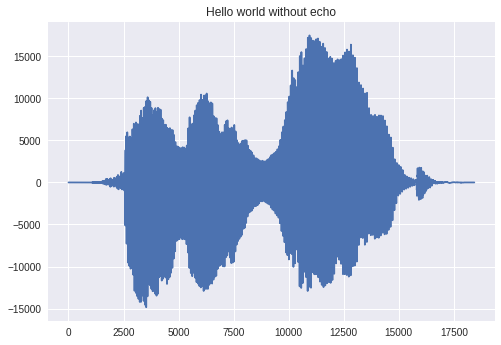

In [30]:
plt.plot(signal)
plt.title("Hello world without echo")
plt.show()

The Convolution with the delta function.
As the signal with delta function produces the original signal we can see here.....
The original singnal will not change

In [32]:
delta = np.array([1., 0., 0.]) #one 1 and all 0's
noecho = np.convolve(signal, delta)
noecho.shape #shape will be changed

(18434,)

In [0]:
# make sure you do this, otherwise, you will get VERY LOUD NOISE

noecho = noecho.astype(np.int16) 
write('noecho.wav', 16000, noecho)

In [0]:
# Creating the filter for the echo
# creating the filter that is 16000 sample long which is 1 second
# And having the decreasing pattern at even intervals
# So here, we repeate the original signal every 4000 samples which is quarter
# of a second

In [0]:
filt = np.zeros(16000)

filt[0] = 1   # filt=1 just to repeate itself
filt[4000] = 0.3   # At 4000 decrease by 0.6
filt[8000] = 0.2
filt[15999] = 0.1

# convolving the original sound with echo filter
out = np.convolve(signal, filt)

In [0]:
# make sure you do this, otherwise, you will get VERY LOUD NOISE
out = out.astype(np.int16)
write('outecho.wav',16000, out)